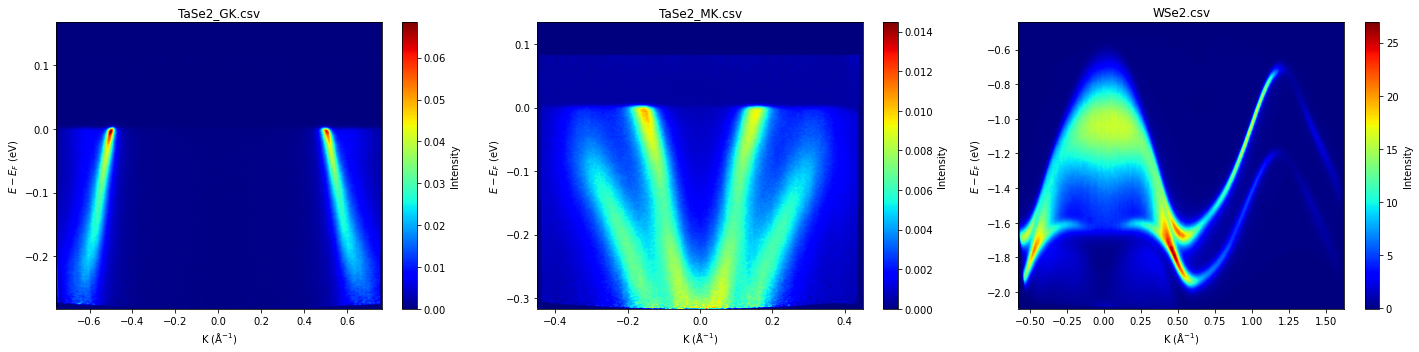

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp2d

# CSV 파일 경로 및 파일명 리스트
csv_files = ['TaSe2_GK.csv', 'TaSe2_MK.csv', 'WSe2.csv']

# matrix 저장을 위한 리스트
matrix_list = []
new_matrix_list = []

# 시작값과 간격값 설정
start_be = [-0.28271, -0.316606, -2.09679]  # 파일별 시작값
delta_be = [0.0005, 0.0005, 0.00159001]  # 파일별 간격값
start_K = [-0.755169, -0.449906, -0.578732]  # 파일별 시작값
delta_K = [0.00138108, 0.00140804, 0.00166317]  # 파일별 간격값

for file, start_be_val, delta_be_val, start_K_val, delta_K_val in zip(csv_files, start_be, delta_be, start_K, delta_K):
    # CSV 파일 읽기
    data = np.genfromtxt(file, delimiter=',')
    matrix = np.transpose(data)
    
    # matrix 리스트에 추가
    matrix_list.append(matrix)

def make_new_matrix_list(matrix_list):
    num_plots = len(matrix_list)
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(20, 5))
    
    for i in range(num_plots):
        # 데이터 변경 (시작값과 간격값 적용)
        be_unit = 'eV'
        binding_energy = np.linspace(start_be[i], start_be[i] + delta_be[i] * matrix_list[i].shape[0], matrix_list[i].shape[0])
        K_unit = '(Å$^{-1}$)'
        K = np.linspace(start_K[i], start_K[i] + delta_K[i] * matrix_list[i].shape[1], matrix_list[i].shape[1])
    
        
        
        # 2차원 보간 함수 생성
        interp_func = interp2d(K, binding_energy, matrix_list[i], kind='linear') # kind = 'linear': 선형 보간, 'cubic': 3차 스플라인 보간, 'quintic': 5차 스플라인 보간
        # 새로운 K, binding_energy 생성
        new_K = np.linspace(K.min(), K.max(), 600)
        new_binding_energy = np.linspace(binding_energy.min(), binding_energy.max(), 600)
        # 새로운 K와 binding_energy에 따른 matrix 생성
        new_matrix = interp_func(new_K, new_binding_energy)
        
        new_matrix_list.append(new_matrix)
    
    
    
        im = axes[i].imshow(new_matrix_list[i], extent=[new_K[0], new_K[-1], new_binding_energy[0], new_binding_energy[-1]], aspect='auto', cmap='jet', origin='lower')
        axes[i].set_title(csv_files[i])
        axes[i].set_xlabel('K (Å$^{-1}$)')
        axes[i].set_ylabel('$E-E_F$ ({0})'.format(be_unit))
        cbar = fig.colorbar(im, ax=axes[i])
        cbar.set_label('Intensity')
    
    plt.tight_layout()
    plt.show()

make_new_matrix_list(matrix_list)

In [2]:
new_matrix_list[0]

array([[nan,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [3]:
new_matrix_list[0].shape

(600, 600)

In [4]:
pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
import cv2

# 원본 이미지 변수
original_image = new_matrix_list[0]





# 노이즈가 있는 이미지 생성 (원본 이미지에 가우시안 노이즈 추가)
mean = 0
stddev = 0.0001  # 노이즈의 표준 편차 조절
#noisy_image = original_image + np.random.normal(mean, stddev, original_image.shape).astype(np.uint8)
noisy_image = []




# 노이즈가 없는 정답 이미지 준비 (=원본 이미지)
clean_image = original_image






# 데이터셋 구성을 위해 입력 데이터와 정답 데이터를 쌍으로 구성
training_data = [(noisy_image, clean_image)]





# 가우시안 노이즈를 사용한 데이터 증강
num_augmented_images = 5
augmented_noisy_image_list = []
for i in range(num_augmented_images):
    np.random.seed(i)  # 시드 값을 반복문 변수 i로 설정
    augmented_noisy_image = original_image + np.random.normal(mean, stddev, original_image.shape)
    training_data.append((augmented_noisy_image, clean_image))
    augmented_noisy_image_list.append(augmented_noisy_image)

# 학습 데이터셋에 대한 추가적인 전처리 및 데이터 확장을 수행할 수도 있음



In [34]:
np.shape(training_data) #입력 데이터와 정답 데이터를 쌍

(6, 2)

In [35]:
np.shape(augmented_noisy_image_list)

(5, 600, 600)

In [36]:
augmented_noisy_image_list[0]

array([[            nan,  4.00157208e-05,  9.78737984e-05, ...,
        -2.16731471e-05, -9.30156503e-05, -1.78589092e-05],
       [-1.55042935e-04,  4.17318821e-05, -9.44368491e-05, ...,
        -5.93777448e-05, -2.01188032e-04,  5.89703606e-05],
       [-8.96369723e-05, -1.96273201e-04,  1.58482053e-04, ...,
         1.83450254e-05, -4.70742498e-05,  2.72796390e-05],
       ...,
       [-4.95104311e-05,  1.08751548e-04, -1.16671918e-04, ...,
         9.30596481e-05,  2.10034707e-05, -1.03175714e-04],
       [ 3.07769456e-05, -1.05684266e-04,  1.03608107e-04, ...,
        -2.46610095e-07, -5.57517822e-05, -1.15522416e-05],
       [ 1.02397917e-04,  1.18472277e-04, -1.27153863e-04, ...,
         6.92367378e-05,  3.83439680e-05, -6.97143474e-05]])

In [37]:
augmented_noisy_image_list[1] 

array([[            nan, -6.11756414e-05, -5.28171752e-05, ...,
         9.86352180e-05, -4.66154857e-05,  1.38499134e-04],
       [-1.07296428e-04,  4.95158611e-05, -9.52062101e-05, ...,
        -1.44899155e-04,  7.79491866e-05, -1.08630091e-04],
       [-5.39032580e-05,  6.44099988e-05,  1.83633574e-05, ...,
         1.99899201e-04,  7.64041420e-05,  1.68725522e-04],
       ...,
       [ 1.11132037e-04, -3.29301804e-05,  1.02843572e-04, ...,
        -9.32504653e-05, -4.24132052e-05, -1.46480944e-05],
       [-1.00418072e-04,  7.13041841e-05,  8.78121559e-05, ...,
        -1.27264805e-05, -1.84213556e-04,  7.07746243e-05],
       [ 8.38270630e-05, -4.33570958e-05,  1.77112075e-04, ...,
        -8.81603984e-06,  1.18504505e-04, -1.64863570e-06]])

In [38]:
tf = (augmented_noisy_image_list[0] == augmented_noisy_image_list[1] )

In [42]:
def plot_new_matrix_list(matrix_list):
    num_plots = len(augmented_noisy_image_list)
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(30, 5))
    
    for i in range(num_plots):
        # 데이터 변경 (시작값과 간격값 적용)
        be_unit = 'eV'
        binding_energy = np.linspace(start_be[0], start_be[0] + delta_be[0] * matrix_list[0].shape[0], matrix_list[i].shape[0])
        K_unit = '(Å$^{-1}$)'
        K = np.linspace(start_K[0], start_K[0] + delta_K[0] * matrix_list[0].shape[1], matrix_list[0].shape[1])
    
        im = axes[i].imshow(matrix_list[i], extent=[K[0], K[-1], binding_energy[0], binding_energy[-1]], aspect='auto', cmap='jet', origin='lower')
        axes[i].set_xlabel('K (Å$^{-1}$)')
        axes[i].set_ylabel('$E-E_F$ ({0})'.format(be_unit))
        cbar = fig.colorbar(im, ax=axes[i])
        cbar.set_label('Intensity')
    
    plt.tight_layout()
    plt.show()


In [43]:
len(augmented_noisy_image_list)

5

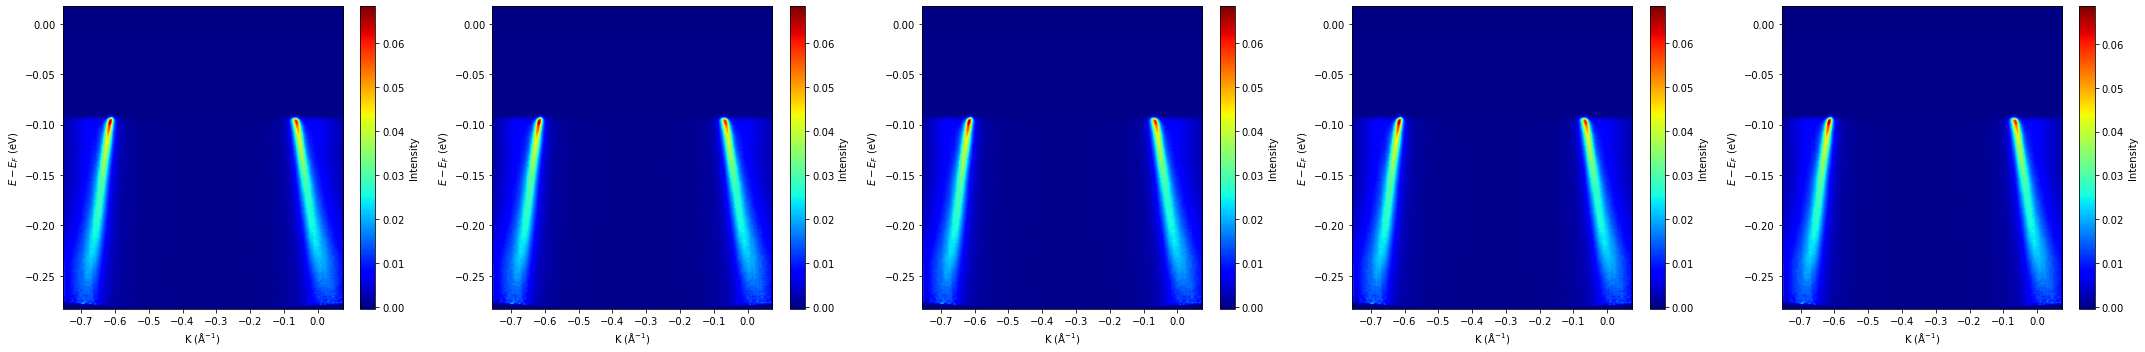

In [44]:
plot_new_matrix_list(augmented_noisy_image_list)

In [214]:
augmented_noisy_image_list[0] == augmented_noisy_image_list[1] 

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [215]:
tf

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [234]:
# binding_energy와 K 그래프 CSV 파일로 저장
df = pd.DataFrame(tf )
df.columns.name = 'K (Å$^{-1}$)'
df.index.name = '$E-E_F$ ({0})'
df.to_csv('tf.csv')

In [235]:
# binding_energy와 K 그래프 CSV 파일로 저장
df = pd.DataFrame(augmented_noisy_image_list[0] )
df.columns.name = 'K (Å$^{-1}$)'
df.index.name = '$E-E_F$ ({0})'
df.to_csv('augmented_noisy_image_list[0].csv')

한것들 
-물질들 plot
-물질 하나를 가우시안 노이즈 묻혀서 데이터 증강

해야하는것들
-for 돌려서 물질들 각각 가우시안 노이즈 묻혀서 데이터 증강
-입력,정답 데이터 쌍으로 데이터셋 구성 (코드는 만들어 놓음. 데이터만 필요함.)


